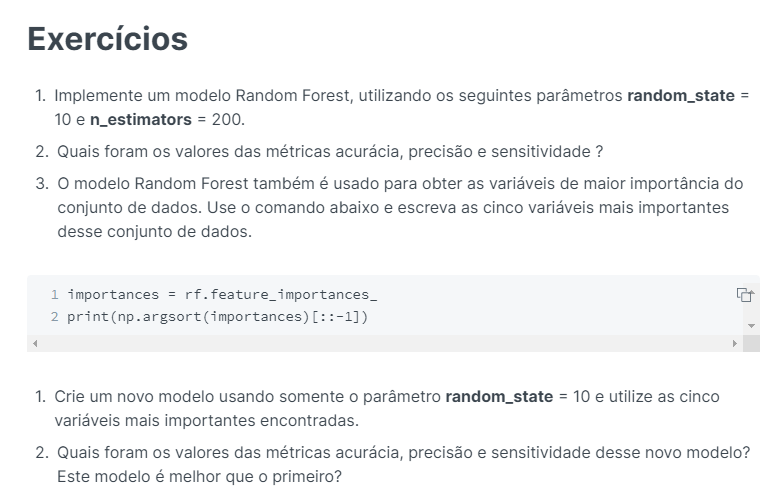

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
df = pd.read_csv('/content/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
X = df.drop('Classification', axis = 1)
y = df['Classification']
y = y.map({1:0,
           2:1})

# 1. Implemente um modelo Random Forest, utilizando os seguintes parâmetros random_state = 10 e n_estimators = 200.

In [ ]:
# Arvores de decisão lidam com comparações, logo, a normalização dos dados não é necessaria
# Divisão e ajuste do modelo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

rand_forest = RandomForestClassifier(n_estimators=200, random_state = 10)
rand_forest = rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

# 2. Quais foram os valores das métricas acurácia, precisão e sensitividade ?

In [ ]:
print(f"""Acurácia: {accuracy_score(y_test, y_pred)}
Precisão: {precision_score(y_test, y_pred)}
Sensitivade: {recall_score(y_test, y_pred)}""")

Acurácia: 0.7083333333333334
Precisão: 0.6923076923076923
Sensitivade: 0.75


# 3. O modelo Random Forest também é usado para obter as variáveis de maior importância do conjunto de dados. Use o comando abaixo e escreva as cinco variáveis mais importantes desse conjunto de dados.

In [ ]:
importances = rand_forest.feature_importances_ # array de importancias, sum = 1, quanto maior mais importante
print(np.argsort(importances)[::-1]) # ordena OS INDICES do menor para o maior e inverte

[2 4 0 1 7 3 5 8 6]


In [ ]:
ind_importance = np.argsort(importances)[::-1][0:5]
print(f"Os indices mais importantes são: {ind_importance}")

Os indices mais importantes são: [2 4 0 1 7]


# 4. Crie um novo modelo usando somente o parâmetro random_state = 10 e utilize as cinco variáveis mais importantes encontradas.

In [ ]:
X_importances = X.iloc[:,ind_importance]

X_train, X_test, y_train, y_test = train_test_split(X_importances, y, random_state = 10, test_size = 0.2)

rand_forest = RandomForestClassifier(n_estimators=200, random_state = 10)
rand_forest = rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

# 5. Quais foram os valores das métricas acurácia, precisão e sensitividade desse novo modelo? Este modelo é melhor que o primeiro?

In [ ]:
print(f"""Acurácia: {accuracy_score(y_test, y_pred)}
Precisão: {precision_score(y_test, y_pred)}
Sensitivade: {recall_score(y_test, y_pred)}""")

Acurácia: 0.875
Precisão: 0.9090909090909091
Sensitivade: 0.8333333333333334


Sim, este modelo é melhor que o anterior.